<h1>Arbol de Desiciones</h1>

<h3>Cristian Mateo Samboni Muñoz</h3>
<h3>Linda Katerin Rodriguez Moya</h3>

<h5>Contiene información de 10 clases de calidad del vino, el proposito es evaluar las propiedades fisicas y quimicas del vino con el fin de evaluar su calidad</h5>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

<h3>Seleccionamos el archivo y lo visualizamos</h3>

In [88]:
Datos = pd.read_csv('D:/winequality-red.csv')
Datos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<h3>Contamos la cantidad de datos y las variables</h3>

In [91]:
Datos.shape

(1599, 12)

<h3>Hacemos una descripción de los datos sacando la media, percentiles y datos minimos y maximos</h3>

In [94]:
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h3>Bucamos datos nulos o faltantes</h3>

In [97]:
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3>Miramos la clasificación del vino almacenada en la variable quality</h3>

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

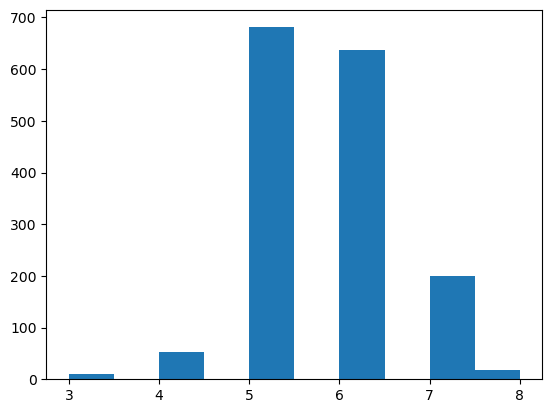

In [100]:
#calificacion de los vinos va de 0 (el mas malo) y 10 (el mejor)
plt.hist(Datos.quality)

<h3>Evaluamos la corelación entre las variables y la calidad evaluada de 0 el mas malo a 10 el mejor</h3>

<Axes: xlabel='volatile acidity', ylabel='citric acid'>

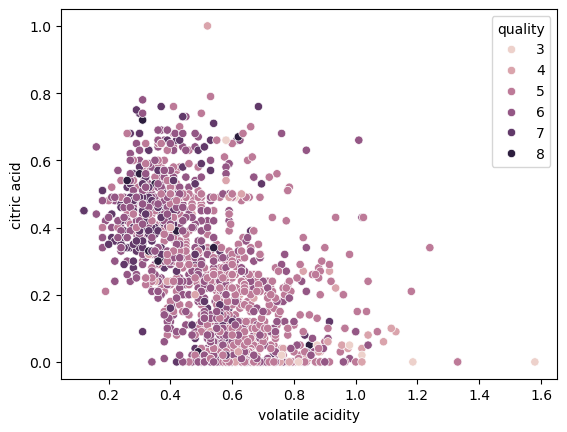

In [103]:
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'quality', data = Datos)

<h3>Evaluamos los datos atipicos de las variables que usaremos para entrenar y testear el modelo</h3>

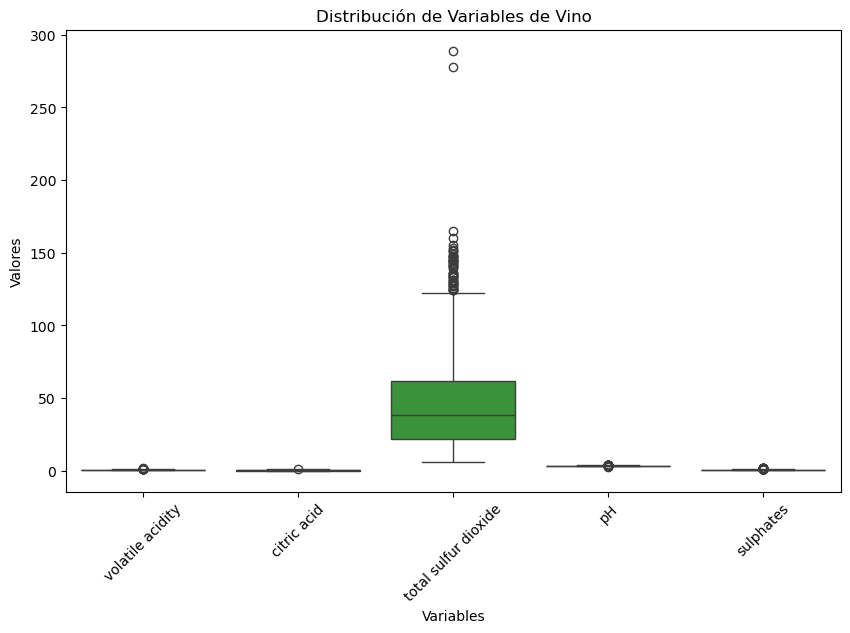

In [106]:
plt.figure(figsize = (10,6))
sns.boxplot(data = Datos[['volatile acidity','citric acid','total sulfur dioxide','pH','sulphates']])
plt.xticks(rotation = 45)
plt.title('Distribución de Variables de Vino')
plt.ylabel('Valores')
plt.xlabel('Variables')
plt.show()

<h3>Buscamos datos atipicos en la variable "total sulfur dioxide"</h3>

In [109]:
oxido_sulfuro_max = (Datos['total sulfur dioxide'] > 300).sum()
print('Datos atipicos de la variable total sulfur dioxide: ', oxido_sulfuro_max)

Datos atipicos de la variable total sulfur dioxide:  0


<h3>Establecemos las variables almacenadoras que contenga los datos que entrenaran y testearan el modelo</h3>

In [112]:
base_predicciones = ['volatile acidity','citric acid','total sulfur dioxide','pH','sulphates']
variable_a_predecir = ['quality']

In [114]:
predicciones = Datos[base_predicciones]
predecir = Datos[variable_a_predecir]

In [116]:
predicciones

,volatile acidity,citric acid,total sulfur dioxide,pH,sulphates
0,0.700,0.00,34.0,3.51,0.56
1,0.880,0.00,67.0,3.20,0.68
2,0.760,0.04,54.0,3.26,0.65
3,0.280,0.56,60.0,3.16,0.58
4,0.700,0.00,34.0,3.51,0.56
...,...,...,...,...,...
1594,0.600,0.08,44.0,3.45,0.58
1595,0.550,0.10,51.0,3.52,0.76
1596,0.510,0.13,40.0,3.42,0.75
1597,0.645,0.12,44.0,3.57,0.71


In [118]:
predecir

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


<h3>Miramos la correlación entre variables</h3>

In [121]:
correlacion = predicciones.corr()
correlacion

,volatile acidity,citric acid,total sulfur dioxide,pH,sulphates
volatile acidity,1.000000,-0.552496,0.076470,0.234937,-0.260987
citric acid,-0.552496,1.000000,0.035533,-0.541904,0.312770
total sulfur dioxide,0.076470,0.035533,1.000000,-0.066495,0.042947
pH,0.234937,-0.541904,-0.066495,1.000000,-0.196648
sulphates,-0.260987,0.312770,0.042947,-0.196648,1.000000


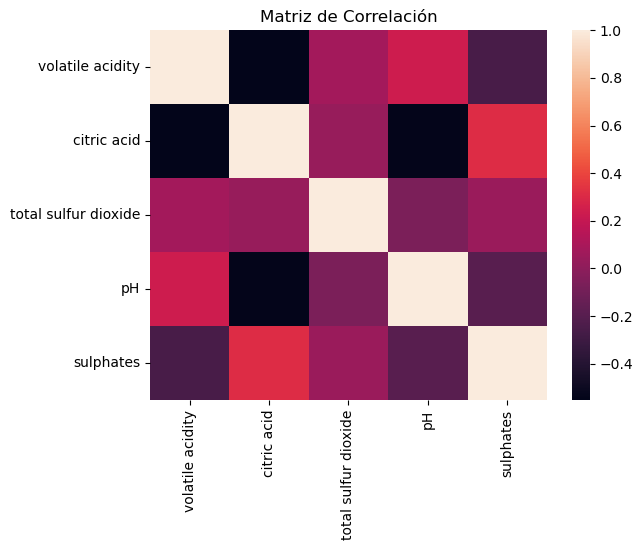

In [123]:
sns.heatmap(correlacion)
plt.title('Matriz de Correlación')
plt.show()

<h4>- volatile acidity y citric acid: Tienen una correlación negativa fuerte de -0.552, lo que sugiere que, en general, a medida que aumenta la acidez volátil, disminuye el ácido cítrico. Este comportamiento puede influir en la percepción de frescura del vino.</h4>

<h4>- citric acid y pH: La correlación negativa de -0.542 indica que a mayor acidez (más bajo el valor de pH), mayor es la presencia de ácido cítrico. Esto es importante, ya que el pH y la acidez son factores de calidad y frescura en el vino.</h4>

<h4>- citric acid y sulphates: Tienen una correlación positiva moderada de 0.313, lo cual indica que los vinos con más ácido cítrico tienden a tener también más sulfitos. Esto puede contribuir a la estabilidad y preservación del vino.</h4>

<h4>- volatile acidity y pH: Correlación positiva moderada de 0.235, sugiriendo que la acidez volátil podría aumentar cuando el pH es más alto, lo que puede impactar negativamente en la calidad percibida del vino.</h4>


<h3>Empezamos a crear el modelo y seleccionar la cantidad de datos usados en entrenar y en testear el modelo</h3>

<h4>Decidimos que para realizar el entrenamiento se selecciona el 75% y un 25% parahacer el test del modelo</h4>

In [128]:
x_train, x_test, y_train, y_test = train_test_split(predicciones, predecir, test_size = 0.25, random_state = 13)

In [130]:
tree = DecisionTreeClassifier()

In [132]:
arbol = tree.fit(x_train, y_train)

[Text(0.4826450689120117, 0.9761904761904762, 'x[4] <= 0.585\ngini = 0.644\nsamples = 1199\nvalue = [8.0, 42.0, 500.0, 487.0, 150.0, 12.0]'),
 Text(0.12694670728368018, 0.9285714285714286, 'x[0] <= 0.365\ngini = 0.565\nsamples = 452\nvalue = [6.0, 30.0, 264.0, 134.0, 18.0, 0.0]'),
 Text(0.03797006206644761, 0.8809523809523809, 'x[2] <= 46.0\ngini = 0.626\nsamples = 57\nvalue = [0, 3, 15, 30, 9, 0]'),
 Text(0.011683096020445418, 0.8333333333333334, 'x[2] <= 10.5\ngini = 0.482\nsamples = 32\nvalue = [0, 1, 3, 22, 6, 0]'),
 Text(0.005841548010222709, 0.7857142857142857, 'x[1] <= 0.405\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 0, 4, 5, 0]'),
 Text(0.0029207740051113546, 0.7380952380952381, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0]'),
 Text(0.008762322015334063, 0.7380952380952381, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.017524644030668127, 0.7857142857142857, 'x[4] <= 0.455\ngini = 0.367\nsamples = 23\nvalue = [0, 1, 3, 18, 1, 0]'),
 Text(0.0146038700255

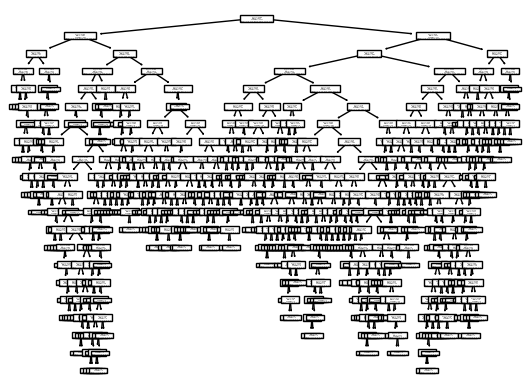

In [134]:
plot_tree(arbol)

In [135]:
predicciones = arbol.predict(x_test)

In [136]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 7, 7, 6, 7, 5, 6, 5, 7,
       7, 5, 7, 5, 6, 5, 5, 6, 8, 5, 5, 6, 6, 7, 7, 5, 7, 5, 7, 5, 6, 6,
       5, 5, 6, 8, 6, 6, 5, 4, 7, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7, 7,
       6, 6, 5, 4, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       7, 7, 4, 6, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 7, 7, 6, 5, 5,
       5, 7, 7, 6, 6, 6, 6, 7, 5, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 7, 6, 6,
       6, 7, 7, 5, 7, 5, 6, 6, 6, 5, 3, 7, 7, 5, 7, 3, 7, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       5, 5, 6, 6, 4, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 7,
       5, 5, 6, 7, 7, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 6, 7, 6, 5,
       6, 6, 6, 7, 5, 5, 5, 5, 6, 5, 4, 6, 7, 6, 5, 6, 4, 6, 5, 5, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 7, 4, 5, 5, 6, 6,

<h3>Examinamos la cantidad de datos en una matriz de confusión</h3>

<h4>Esta matriz compara los datos reales con los predichos por el modelo</h4>

In [138]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames = ['Actual'], colnames = ['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,1,1,0,0,0
4,1,1,5,2,2,0
5,2,4,117,46,12,0
6,0,5,38,90,17,1
7,0,0,4,18,26,1
8,0,0,0,2,4,0


<h2>Ahora analizamos y evaluaremos el rendimiento del modelo</h2>

<h4>Accuracy_score calcula el porcentaje de predicciones correctas comparando las etiquetas reales con las predichas por el modelo, va de cero (valor malo) a 1 (valor bueno) </h4>

In [141]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.585

<h4>Precision_score calcula cuántas de las muestras que el modelo predijo como positivas realmente lo son. Mide de cero (valor malo) a 1 (valor bueno)</h4>

In [143]:
precision = precision_score(y_test, predicciones, average = 'weighted')
precision

0.590608396687355

<h4>Recall_score indica qué tan bien el modelo detecta todas las muestras verdaderamente positivas. Mide de cero (no identifico ninguna muestra positiva) a 1 (identificó correctamente todas las muestras positivas)</h4>

In [145]:
recall = recall_score(y_test, predicciones, average = 'weighted')
recall

0.585

<h4>Recall_score mide el equilibrio entre precisión (precision_score) y sensibilidad (recall_score). Mide de cero (un rendimiento bajo en precisión y/o recall) y 1 (un rendimiento bajo en precisión y/o recall)</h4>

In [147]:
f1 = f1_score(y_test, predicciones, average = 'weighted')
f1

0.5863380150911437

<h3>Analisis: Tras la realización del modelo de arbol de decisiones y la evaluación del modelo, los resultados son los siguientes</h3>

<h4>- Accuracy: 0,585 dado que el valor maximo es 1, esto nos dice que el valor de prediccion correspondiente a los valores reales del modelo es del 58,5%</h4>

<h4>- Precision: 0,5906 dado que el valor maximo es 1, esto nos dice que el valor de prediccion con respecto a los valores que se predijeron como positivas y fueron correctas. El valor del modelo fue de 0,5906 lo que significa que fue de 59,6%</h4>

<h4>- Recall: 0,585 dado que el valor maximo es 1, esto nos dice que el valor de prediccion mide el porcentaje de muestras positivas que se predijeron correctamente. El valor del modelo fue de 0,585 lo que significa que fue de 58,5%</h4>

<h4>- F1: 0,586 muestra el equilibrio entre los valores reales y los predichos por el modelo y medidos por recall y presicion. El valor del modelo fue de 0,586 lo que significa que fue de 58,6%</h4>